# How to properly prevent overfitting

🎯 **Goals of this challenge**
- **`Cross Validate`** a Deep Learning Model
- Give a **`Validation Set`** to the model
- Apply two techniques to prevent overfitting:
    - Use the **`Early Stopping`** criterion to prevent the Neural network from over-learning / over-fitting
    - **`Regularize`** your network
- Analyse the **`impact of the batch size and the number of epochs`** on the training of a Neural Network

In [1]:
# DATA MANIPULATION
import numpy as np

# DATA VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline

## Data: the `blobs` dataset

In [2]:
# BLOB DATASET
from sklearn.datasets import make_blobs

❓ **Question: generating a "blobs dataset"** ❓ 

First, let's generate some data using the [`make_blob`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function from Scikit-Learn

Generate:
* 2000 samples with 10 features each
* There should be 8 classes of blobs (`centers` argument), with `cluster_std` equal to 7. 

In [66]:
data = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7)
data

(array([[-5.40205483e+00, -7.65911289e-01,  4.71850190e+00, ...,
         -5.98954470e+00, -2.98907394e+00, -6.46481816e+00],
        [-1.93707680e+01, -7.28909748e+00, -9.58560440e+00, ...,
          5.92595245e-01, -5.69202836e+00, -7.04897805e+00],
        [-7.51118528e+00, -9.03310091e+00,  3.06578659e+00, ...,
         -2.77604973e+00,  2.51790002e-02, -5.80285911e-01],
        ...,
        [-1.25081689e+01,  5.72385654e+00, -8.75724703e+00, ...,
          2.91976888e-03,  3.50399654e+00,  3.53265352e-02],
        [-9.86841626e+00,  2.06689522e+00, -6.63633057e+00, ...,
         -2.79951416e+00,  4.16899785e+00,  4.40612793e+00],
        [-3.63678763e+00,  8.97777273e+00, -1.70858191e+01, ...,
         -1.48851599e+00,  8.30846287e+00, -3.20376632e+00]]),
 array([7, 4, 4, ..., 4, 4, 2]))

❓ **Question: visualizing the dataset** ❓

All your samples have 10 features.
Plot one dimension vs. another one.

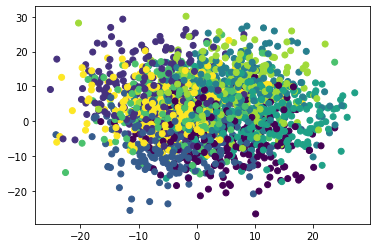

In [50]:
plt.scatter(data[0][:,0], data[0][:,2], c = data[1])

❓ **Question: "encoding" your categorical target** ❓ 

Use the **to_categorical** function from **tensorflow.keras** to convert `y` to `y_cat` which is the categorical representation of `y` with "*one-hot encoded*" columns.

In [7]:
from tensorflow.keras.utils import to_categorical 

In [67]:
X = data[0]
y = data[1]
y_cat = to_categorical(y)

In [68]:
X

array([[-5.40205483e+00, -7.65911289e-01,  4.71850190e+00, ...,
        -5.98954470e+00, -2.98907394e+00, -6.46481816e+00],
       [-1.93707680e+01, -7.28909748e+00, -9.58560440e+00, ...,
         5.92595245e-01, -5.69202836e+00, -7.04897805e+00],
       [-7.51118528e+00, -9.03310091e+00,  3.06578659e+00, ...,
        -2.77604973e+00,  2.51790002e-02, -5.80285911e-01],
       ...,
       [-1.25081689e+01,  5.72385654e+00, -8.75724703e+00, ...,
         2.91976888e-03,  3.50399654e+00,  3.53265352e-02],
       [-9.86841626e+00,  2.06689522e+00, -6.63633057e+00, ...,
        -2.79951416e+00,  4.16899785e+00,  4.40612793e+00],
       [-3.63678763e+00,  8.97777273e+00, -1.70858191e+01, ...,
        -1.48851599e+00,  8.30846287e+00, -3.20376632e+00]])

In [52]:
y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)


## (1) Cross Validation in Deep Learning

👩🏻‍🏫 In a previous challenge, we split the dataset into a train set and a test set at the beginning of the notebook. 

And then, we started to build different models which were trained on the train set and evaluated on the test set.

So, at the end of the day, we used the test set everytime we evaluated our models and different hyperparameters. This is normal: we train on the train set and we evaluate on the test set.

However, we selected our _"best model"_ based on the score of each model. In other words, we _used_ the test set to select our best model, which is a sort of ❗️ `data-leakage` ❗️

🤔 What should I do ? 

* A first good practice is to avoid using `random_state` or any deterministic separation between your train and test set. In that case, your test set will change everytime you re-run your notebook. But this is far from being sufficient.

* To compare models properly, you have to run a cross-validation, a 10-fold split for instance. 

🧐 If you look at [sklearn.model_selection.cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), this Cross Validation tool is designed for Machine Learning algorithms implemented in Scikit Learn... whereas we have been creating and using Neural Networks from Tensorflow/Keras.

🔥 Let's discover how to **Cross-Validate a Neural Network**.

❓ **Question: designing a Neural Network** ❓ 

First, write a function that generates a Neural Network with 3 layers:

<u>Architecture</u>
- an *input layer* with 25 neurons, the `relu` activation function and the appropriate `input_dim`
- a *hidden layer* with 10 neurons and the `relu` activation function.
- a *predictive layer* which is suited to the problem at hand (*multiclass classification*)

<u>Compilation</u>

The function should include a compilation method with :
- the *categorical_crossentropy* loss, 
- the *adam* optimizer 
- the *accuracy* metrics.

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
def initialize_model(X_train):
    model = models.Sequential()
    
    model.add(layers.Dense(25, activation ='relu', input_dim = X_train.shape[1]))
    model.add(layers.Dense(10, activation ='relu'))
    
    model.add(layers.Dense(8, activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
    
    return model


❓ **Question: Cross-Validating the Neural Net** ❓ 

🧑🏻‍💻 Write a _loop_ using the [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function from Scikit-Learn.

* ✂️ Choose 10 splits to fit your model on the train data
* 🧪 Evaluate your model on the test data. Store the results of the evaluation into a `results` variable.

_Hints_:
* ⚖️ Do not forget to standardize your train data before fitting the neural network.
* 👌 Also, 150 epochs should be sufficient for a first approximation
* 🤝 As this is your first Deep Learning Cross Validation, you are guided. Uncomment the following cell and follow the steps.
* ⏳ Notice that we added `%% time` at the beginning of this Jupyter Notebook cell to display its running time and we encourage you to do so whenever you have expensive computations.

In [18]:
%%time

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):
    
    # Split the data into train and test
    
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y_cat[train_index]
    y_test = y_cat[test_index]
    
    # Scaling your data

    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    # Initialize the model

    model = initialize_model(X_train_scaled)   
    
    # Fit the model on the train data

    model.fit(X_train_scaled, y_train, epochs = 150)   
    
    # Evaluate the model on the test data
    
    results.append(model.evaluate(X_test_scaled, y_test)[1])

Epoch 1/150
57/57 [==============================] - 0s 676us/step - loss: 2.0376 - accuracy: 0.1406
Epoch 2/150
57/57 [==============================] - 0s 612us/step - loss: 1.8465 - accuracy: 0.3328
Epoch 3/150
57/57 [==============================] - 0s 599us/step - loss: 1.6228 - accuracy: 0.4878
Epoch 4/150
57/57 [==============================] - 0s 625us/step - loss: 1.3692 - accuracy: 0.6000
Epoch 5/150
57/57 [==============================] - 0s 619us/step - loss: 1.1150 - accuracy: 0.6806
Epoch 6/150
57/57 [==============================] - 0s 632us/step - loss: 0.9234 - accuracy: 0.7100
Epoch 7/150
57/57 [==============================] - 0s 619us/step - loss: 0.8034 - accuracy: 0.7367
Epoch 8/150
57/57 [==============================] - 0s 617us/step - loss: 0.7337 - accuracy: 0.7533
Epoch 9/150
57/57 [==============================] - 0s 627us/step - loss: 0.6897 - accuracy: 0.7622
Epoch 10/150
57/57 [==============================] - 0s 602us/step - loss: 0.6637 - accura

57/57 [==============================] - 0s 612us/step - loss: 0.5240 - accuracy: 0.8067
Epoch 82/150
57/57 [==============================] - 0s 564us/step - loss: 0.5249 - accuracy: 0.8100
Epoch 83/150
57/57 [==============================] - 0s 582us/step - loss: 0.5224 - accuracy: 0.8061
Epoch 84/150
57/57 [==============================] - 0s 559us/step - loss: 0.5229 - accuracy: 0.8078
Epoch 85/150
57/57 [==============================] - 0s 598us/step - loss: 0.5217 - accuracy: 0.8117
Epoch 86/150
57/57 [==============================] - 0s 601us/step - loss: 0.5217 - accuracy: 0.8117
Epoch 87/150
57/57 [==============================] - 0s 591us/step - loss: 0.5194 - accuracy: 0.8100
Epoch 88/150
57/57 [==============================] - 0s 573us/step - loss: 0.5195 - accuracy: 0.8122
Epoch 89/150
57/57 [==============================] - 0s 564us/step - loss: 0.5193 - accuracy: 0.8089
Epoch 90/150
57/57 [==============================] - 0s 548us/step - loss: 0.5193 - accuracy: 

57/57 [==============================] - 0s 583us/step - loss: 0.6959 - accuracy: 0.7594
Epoch 11/150
57/57 [==============================] - 0s 656us/step - loss: 0.6751 - accuracy: 0.7567
Epoch 12/150
57/57 [==============================] - 0s 571us/step - loss: 0.6596 - accuracy: 0.7739
Epoch 13/150
57/57 [==============================] - 0s 581us/step - loss: 0.6423 - accuracy: 0.7756
Epoch 14/150
57/57 [==============================] - 0s 582us/step - loss: 0.6333 - accuracy: 0.7850
Epoch 15/150
57/57 [==============================] - 0s 566us/step - loss: 0.6222 - accuracy: 0.7828
Epoch 16/150
57/57 [==============================] - 0s 550us/step - loss: 0.6141 - accuracy: 0.7811
Epoch 17/150
57/57 [==============================] - 0s 559us/step - loss: 0.6082 - accuracy: 0.7933
Epoch 18/150
57/57 [==============================] - 0s 535us/step - loss: 0.6013 - accuracy: 0.7911
Epoch 19/150
57/57 [==============================] - 0s 541us/step - loss: 0.5956 - accuracy: 

57/57 [==============================] - 0s 552us/step - loss: 0.5049 - accuracy: 0.8144
Epoch 91/150
57/57 [==============================] - 0s 567us/step - loss: 0.5029 - accuracy: 0.8183
Epoch 92/150
57/57 [==============================] - 0s 555us/step - loss: 0.5041 - accuracy: 0.8156
Epoch 93/150
57/57 [==============================] - 0s 604us/step - loss: 0.5038 - accuracy: 0.8167
Epoch 94/150
57/57 [==============================] - 0s 582us/step - loss: 0.5032 - accuracy: 0.8172
Epoch 95/150
57/57 [==============================] - 0s 585us/step - loss: 0.5026 - accuracy: 0.8156
Epoch 96/150
57/57 [==============================] - 0s 577us/step - loss: 0.5008 - accuracy: 0.8144
Epoch 97/150
57/57 [==============================] - 0s 568us/step - loss: 0.5021 - accuracy: 0.8144
Epoch 98/150
57/57 [==============================] - 0s 577us/step - loss: 0.5019 - accuracy: 0.8183
Epoch 99/150
57/57 [==============================] - 0s 608us/step - loss: 0.4993 - accuracy: 

57/57 [==============================] - 0s 536us/step - loss: 0.5917 - accuracy: 0.7878
Epoch 20/150
57/57 [==============================] - 0s 567us/step - loss: 0.5885 - accuracy: 0.7833
Epoch 21/150
57/57 [==============================] - 0s 538us/step - loss: 0.5871 - accuracy: 0.7806
Epoch 22/150
57/57 [==============================] - 0s 654us/step - loss: 0.5834 - accuracy: 0.7867
Epoch 23/150
57/57 [==============================] - 0s 549us/step - loss: 0.5801 - accuracy: 0.7867
Epoch 24/150
57/57 [==============================] - 0s 576us/step - loss: 0.5784 - accuracy: 0.7828
Epoch 25/150
57/57 [==============================] - 0s 609us/step - loss: 0.5765 - accuracy: 0.7878
Epoch 26/150
57/57 [==============================] - 0s 555us/step - loss: 0.5727 - accuracy: 0.7917
Epoch 27/150
57/57 [==============================] - 0s 545us/step - loss: 0.5713 - accuracy: 0.7900
Epoch 28/150
57/57 [==============================] - 0s 559us/step - loss: 0.5695 - accuracy: 

57/57 [==============================] - 0s 576us/step - loss: 0.5135 - accuracy: 0.8039
Epoch 100/150
57/57 [==============================] - 0s 573us/step - loss: 0.5106 - accuracy: 0.8083
Epoch 101/150
57/57 [==============================] - 0s 538us/step - loss: 0.5108 - accuracy: 0.8061
Epoch 102/150
57/57 [==============================] - 0s 575us/step - loss: 0.5122 - accuracy: 0.8100
Epoch 103/150
57/57 [==============================] - 0s 538us/step - loss: 0.5088 - accuracy: 0.8039
Epoch 104/150
57/57 [==============================] - 0s 566us/step - loss: 0.5092 - accuracy: 0.8050
Epoch 105/150
57/57 [==============================] - 0s 557us/step - loss: 0.5089 - accuracy: 0.8089
Epoch 106/150
57/57 [==============================] - 0s 547us/step - loss: 0.5079 - accuracy: 0.8061
Epoch 107/150
57/57 [==============================] - 0s 545us/step - loss: 0.5072 - accuracy: 0.8061
Epoch 108/150
57/57 [==============================] - 0s 548us/step - loss: 0.5066 - a

57/57 [==============================] - 0s 566us/step - loss: 0.5886 - accuracy: 0.7878
Epoch 29/150
57/57 [==============================] - 0s 566us/step - loss: 0.5873 - accuracy: 0.7872
Epoch 30/150
57/57 [==============================] - 0s 556us/step - loss: 0.5852 - accuracy: 0.7833
Epoch 31/150
57/57 [==============================] - 0s 555us/step - loss: 0.5830 - accuracy: 0.7872
Epoch 32/150
57/57 [==============================] - 0s 545us/step - loss: 0.5831 - accuracy: 0.7889
Epoch 33/150
57/57 [==============================] - 0s 556us/step - loss: 0.5798 - accuracy: 0.7900
Epoch 34/150
57/57 [==============================] - 0s 547us/step - loss: 0.5786 - accuracy: 0.7911
Epoch 35/150
57/57 [==============================] - 0s 574us/step - loss: 0.5794 - accuracy: 0.7906
Epoch 36/150
57/57 [==============================] - 0s 557us/step - loss: 0.5764 - accuracy: 0.7911
Epoch 37/150
57/57 [==============================] - 0s 551us/step - loss: 0.5753 - accuracy: 

57/57 [==============================] - 0s 556us/step - loss: 0.5268 - accuracy: 0.8028
Epoch 109/150
57/57 [==============================] - 0s 561us/step - loss: 0.5271 - accuracy: 0.7983
Epoch 110/150
57/57 [==============================] - 0s 547us/step - loss: 0.5276 - accuracy: 0.8022
Epoch 111/150
57/57 [==============================] - 0s 549us/step - loss: 0.5237 - accuracy: 0.8050
Epoch 112/150
57/57 [==============================] - 0s 551us/step - loss: 0.5267 - accuracy: 0.8022
Epoch 113/150
57/57 [==============================] - 0s 548us/step - loss: 0.5239 - accuracy: 0.8067
Epoch 114/150
57/57 [==============================] - 0s 549us/step - loss: 0.5245 - accuracy: 0.8000
Epoch 115/150
57/57 [==============================] - 0s 543us/step - loss: 0.5242 - accuracy: 0.8017
Epoch 116/150
57/57 [==============================] - 0s 538us/step - loss: 0.5245 - accuracy: 0.8039
Epoch 117/150
57/57 [==============================] - 0s 569us/step - loss: 0.5238 - a

57/57 [==============================] - 0s 567us/step - loss: 0.5700 - accuracy: 0.7922
Epoch 38/150
57/57 [==============================] - 0s 546us/step - loss: 0.5697 - accuracy: 0.7911
Epoch 39/150
57/57 [==============================] - 0s 566us/step - loss: 0.5694 - accuracy: 0.7939
Epoch 40/150
57/57 [==============================] - 0s 544us/step - loss: 0.5655 - accuracy: 0.7928
Epoch 41/150
57/57 [==============================] - 0s 549us/step - loss: 0.5662 - accuracy: 0.7883
Epoch 42/150
57/57 [==============================] - 0s 558us/step - loss: 0.5639 - accuracy: 0.7911
Epoch 43/150
57/57 [==============================] - 0s 554us/step - loss: 0.5626 - accuracy: 0.7939
Epoch 44/150
57/57 [==============================] - 0s 560us/step - loss: 0.5632 - accuracy: 0.7889
Epoch 45/150
57/57 [==============================] - 0s 559us/step - loss: 0.5607 - accuracy: 0.7894
Epoch 46/150
57/57 [==============================] - 0s 565us/step - loss: 0.5599 - accuracy: 

57/57 [==============================] - 0s 576us/step - loss: 0.5143 - accuracy: 0.8089
Epoch 118/150
57/57 [==============================] - 0s 587us/step - loss: 0.5119 - accuracy: 0.8106
Epoch 119/150
57/57 [==============================] - 0s 564us/step - loss: 0.5128 - accuracy: 0.8044
Epoch 120/150
57/57 [==============================] - 0s 576us/step - loss: 0.5122 - accuracy: 0.8111
Epoch 121/150
57/57 [==============================] - 0s 587us/step - loss: 0.5121 - accuracy: 0.8106
Epoch 122/150
57/57 [==============================] - 0s 577us/step - loss: 0.5126 - accuracy: 0.8106
Epoch 123/150
57/57 [==============================] - 0s 575us/step - loss: 0.5113 - accuracy: 0.8083
Epoch 124/150
57/57 [==============================] - 0s 574us/step - loss: 0.5120 - accuracy: 0.8089
Epoch 125/150
57/57 [==============================] - 0s 579us/step - loss: 0.5090 - accuracy: 0.8078
Epoch 126/150
57/57 [==============================] - 0s 569us/step - loss: 0.5104 - a

57/57 [==============================] - 0s 543us/step - loss: 0.5406 - accuracy: 0.7978
Epoch 47/150
57/57 [==============================] - 0s 559us/step - loss: 0.5384 - accuracy: 0.8011
Epoch 48/150
57/57 [==============================] - 0s 540us/step - loss: 0.5386 - accuracy: 0.8006
Epoch 49/150
57/57 [==============================] - 0s 547us/step - loss: 0.5381 - accuracy: 0.7978
Epoch 50/150
57/57 [==============================] - 0s 566us/step - loss: 0.5370 - accuracy: 0.7956
Epoch 51/150
57/57 [==============================] - 0s 555us/step - loss: 0.5355 - accuracy: 0.8017
Epoch 52/150
57/57 [==============================] - 0s 562us/step - loss: 0.5344 - accuracy: 0.8028
Epoch 53/150
57/57 [==============================] - 0s 540us/step - loss: 0.5342 - accuracy: 0.8022
Epoch 54/150
57/57 [==============================] - 0s 553us/step - loss: 0.5348 - accuracy: 0.8011
Epoch 55/150
57/57 [==============================] - 0s 606us/step - loss: 0.5326 - accuracy: 

57/57 [==============================] - 0s 565us/step - loss: 0.4839 - accuracy: 0.8222
Epoch 127/150
57/57 [==============================] - 0s 586us/step - loss: 0.4832 - accuracy: 0.8222
Epoch 128/150
57/57 [==============================] - 0s 580us/step - loss: 0.4822 - accuracy: 0.8222
Epoch 129/150
57/57 [==============================] - 0s 566us/step - loss: 0.4813 - accuracy: 0.8222
Epoch 130/150
57/57 [==============================] - 0s 584us/step - loss: 0.4799 - accuracy: 0.8228
Epoch 131/150
57/57 [==============================] - 0s 574us/step - loss: 0.4797 - accuracy: 0.8222
Epoch 132/150
57/57 [==============================] - 0s 563us/step - loss: 0.4798 - accuracy: 0.8211
Epoch 133/150
57/57 [==============================] - 0s 564us/step - loss: 0.4815 - accuracy: 0.8289
Epoch 134/150
57/57 [==============================] - 0s 563us/step - loss: 0.4785 - accuracy: 0.8200
Epoch 135/150
57/57 [==============================] - 0s 572us/step - loss: 0.4785 - a

57/57 [==============================] - 0s 654us/step - loss: 0.5264 - accuracy: 0.7994
Epoch 56/150
57/57 [==============================] - 0s 588us/step - loss: 0.5256 - accuracy: 0.8011
Epoch 57/150
57/57 [==============================] - 0s 576us/step - loss: 0.5255 - accuracy: 0.7994
Epoch 58/150
57/57 [==============================] - 0s 584us/step - loss: 0.5251 - accuracy: 0.8017
Epoch 59/150
57/57 [==============================] - 0s 580us/step - loss: 0.5232 - accuracy: 0.8006
Epoch 60/150
57/57 [==============================] - 0s 566us/step - loss: 0.5231 - accuracy: 0.8039
Epoch 61/150
57/57 [==============================] - 0s 585us/step - loss: 0.5200 - accuracy: 0.8022
Epoch 62/150
57/57 [==============================] - 0s 579us/step - loss: 0.5201 - accuracy: 0.8011
Epoch 63/150
57/57 [==============================] - 0s 577us/step - loss: 0.5205 - accuracy: 0.8039
Epoch 64/150
57/57 [==============================] - 0s 572us/step - loss: 0.5178 - accuracy: 

57/57 [==============================] - 0s 614us/step - loss: 0.4733 - accuracy: 0.8222
Epoch 136/150
57/57 [==============================] - 0s 660us/step - loss: 0.4735 - accuracy: 0.8239
Epoch 137/150
57/57 [==============================] - 0s 591us/step - loss: 0.4728 - accuracy: 0.8256
Epoch 138/150
57/57 [==============================] - 0s 585us/step - loss: 0.4702 - accuracy: 0.8239
Epoch 139/150
57/57 [==============================] - 0s 623us/step - loss: 0.4705 - accuracy: 0.8256
Epoch 140/150
57/57 [==============================] - 0s 600us/step - loss: 0.4714 - accuracy: 0.8244
Epoch 141/150
57/57 [==============================] - 0s 592us/step - loss: 0.4705 - accuracy: 0.8272
Epoch 142/150
57/57 [==============================] - 0s 588us/step - loss: 0.4684 - accuracy: 0.8261
Epoch 143/150
57/57 [==============================] - 0s 586us/step - loss: 0.4689 - accuracy: 0.8250
Epoch 144/150
57/57 [==============================] - 0s 599us/step - loss: 0.4689 - a

57/57 [==============================] - 0s 598us/step - loss: 0.5152 - accuracy: 0.8072
Epoch 65/150
57/57 [==============================] - 0s 575us/step - loss: 0.5142 - accuracy: 0.8056
Epoch 66/150
57/57 [==============================] - 0s 565us/step - loss: 0.5148 - accuracy: 0.8083
Epoch 67/150
57/57 [==============================] - 0s 546us/step - loss: 0.5135 - accuracy: 0.8100
Epoch 68/150
57/57 [==============================] - 0s 566us/step - loss: 0.5115 - accuracy: 0.8078
Epoch 69/150
57/57 [==============================] - 0s 561us/step - loss: 0.5095 - accuracy: 0.8089
Epoch 70/150
57/57 [==============================] - 0s 552us/step - loss: 0.5103 - accuracy: 0.8089
Epoch 71/150
57/57 [==============================] - 0s 577us/step - loss: 0.5081 - accuracy: 0.8117
Epoch 72/150
57/57 [==============================] - 0s 559us/step - loss: 0.5082 - accuracy: 0.8083
Epoch 73/150
57/57 [==============================] - 0s 566us/step - loss: 0.5078 - accuracy: 

57/57 [==============================] - 0s 552us/step - loss: 0.4643 - accuracy: 0.8211
Epoch 145/150
57/57 [==============================] - 0s 577us/step - loss: 0.4638 - accuracy: 0.8217
Epoch 146/150
57/57 [==============================] - 0s 558us/step - loss: 0.4626 - accuracy: 0.8233
Epoch 147/150
57/57 [==============================] - 0s 571us/step - loss: 0.4609 - accuracy: 0.8250
Epoch 148/150
57/57 [==============================] - 0s 542us/step - loss: 0.4613 - accuracy: 0.8222
Epoch 149/150
57/57 [==============================] - 0s 564us/step - loss: 0.4599 - accuracy: 0.8228
Epoch 150/150
7/7 [==============================] - 0s 671us/step - loss: 0.8335 - accuracy: 0.7350
Epoch 1/150
57/57 [==============================] - 0s 640us/step - loss: 2.0191 - accuracy: 0.2094
Epoch 2/150
57/57 [==============================] - 0s 559us/step - loss: 1.7635 - accuracy: 0.4483
Epoch 3/150
57/57 [==============================] - 0s 575us/step - loss: 1.4481 - accuracy:

57/57 [==============================] - 0s 581us/step - loss: 0.5315 - accuracy: 0.8017
Epoch 74/150
57/57 [==============================] - 0s 574us/step - loss: 0.5319 - accuracy: 0.7967
Epoch 75/150
57/57 [==============================] - 0s 610us/step - loss: 0.5301 - accuracy: 0.8050
Epoch 76/150
57/57 [==============================] - 0s 569us/step - loss: 0.5305 - accuracy: 0.8011
Epoch 77/150
57/57 [==============================] - 0s 561us/step - loss: 0.5289 - accuracy: 0.7972
Epoch 78/150
57/57 [==============================] - 0s 580us/step - loss: 0.5289 - accuracy: 0.7961
Epoch 79/150
57/57 [==============================] - 0s 575us/step - loss: 0.5270 - accuracy: 0.8022
Epoch 80/150
57/57 [==============================] - 0s 574us/step - loss: 0.5264 - accuracy: 0.7978
Epoch 81/150
57/57 [==============================] - 0s 571us/step - loss: 0.5255 - accuracy: 0.8022
Epoch 82/150
57/57 [==============================] - 0s 563us/step - loss: 0.5265 - accuracy: 

57/57 [==============================] - 0s 699us/step - loss: 1.8640 - accuracy: 0.2883
Epoch 3/150
57/57 [==============================] - 0s 572us/step - loss: 1.6589 - accuracy: 0.4117
Epoch 4/150
57/57 [==============================] - 0s 598us/step - loss: 1.4222 - accuracy: 0.5483
Epoch 5/150
57/57 [==============================] - 0s 571us/step - loss: 1.1738 - accuracy: 0.6406
Epoch 6/150
57/57 [==============================] - 0s 560us/step - loss: 1.0022 - accuracy: 0.6844
Epoch 7/150
57/57 [==============================] - 0s 579us/step - loss: 0.8836 - accuracy: 0.7144
Epoch 8/150
57/57 [==============================] - 0s 587us/step - loss: 0.7977 - accuracy: 0.7283
Epoch 9/150
57/57 [==============================] - 0s 559us/step - loss: 0.7378 - accuracy: 0.7433
Epoch 10/150
57/57 [==============================] - 0s 566us/step - loss: 0.6951 - accuracy: 0.7583
Epoch 11/150
57/57 [==============================] - 0s 566us/step - loss: 0.6670 - accuracy: 0.7633


57/57 [==============================] - 0s 607us/step - loss: 0.5143 - accuracy: 0.8056
Epoch 83/150
57/57 [==============================] - 0s 607us/step - loss: 0.5126 - accuracy: 0.8061
Epoch 84/150
57/57 [==============================] - 0s 595us/step - loss: 0.5116 - accuracy: 0.8056
Epoch 85/150
57/57 [==============================] - 0s 587us/step - loss: 0.5108 - accuracy: 0.8072
Epoch 86/150
57/57 [==============================] - 0s 589us/step - loss: 0.5097 - accuracy: 0.8078
Epoch 87/150
57/57 [==============================] - 0s 609us/step - loss: 0.5088 - accuracy: 0.8100
Epoch 88/150
57/57 [==============================] - 0s 591us/step - loss: 0.5080 - accuracy: 0.8089
Epoch 89/150
57/57 [==============================] - 0s 581us/step - loss: 0.5080 - accuracy: 0.8089
Epoch 90/150
57/57 [==============================] - 0s 581us/step - loss: 0.5098 - accuracy: 0.8106
Epoch 91/150
57/57 [==============================] - 0s 587us/step - loss: 0.5076 - accuracy: 

❓ **Question: Performance of the Cross Validated Network** ❓ 

Print the average accuracy of these 10 folds and the standard deviation of these 10 accuracies.

In [22]:
np.mean(results)

0.7535000085830689

❗ **Remarks about the computational time** ❗

* 🤯 You probably encountered one of the main drawbacks of using a proper cross-validation for a Neural Network: **it takes a lot of time** ! Therefore, for the rest of the Deep-Learning module, we will do ***only one split***. 

* 👮🏻‍♀️ But remember that this is not entirely correct and, for real-life applications and problems, you are encouraged to use a proper cross-validation technique.

* 💼 In general, what practitioners do, is that they split only once, as you did. And once they get to the end of their optimization, they launch a real cross-validation at 6 PM, go home and get the final results on the next day.

❓ **Question: Holdout Method** ❓ 

For the rest of the exercise (and of the Deep Learning module), split the dataset into a train set and a test set with a 70/30% training to test data ratio.

## (2) How to prevent a Neural Network from overfitting ?

### (2.1) Early Stopping

🚦 ***Stop the learning process before overfitting***

❓ **Question: illustrating how a Neural Network can easily overfit...** ❓ 

First things first, let's show that if we train the model for too long, for too many epochs, it will overfit the training data and will not be good at predicting on the test data.

To do it, train the same neural network (⚠️ do not forget to re-initialize it ⚠️) with `validation_data =(X_test, y_test)` and `epochs = 500`. Store the history in a `history` variable.

In [69]:
import random
rate = 0.7

n_train = round(rate * len(X))
X_train = X[:n_train]
X_test = X[n_train:]
y_cat_train = y_cat[:n_train]
y_cat_test = y_cat[n_train:]

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [70]:
X_train

array([[-0.99262814,  0.0164348 ,  0.52632979, ..., -0.04720364,
        -0.2660877 , -0.32604375],
       [-2.56629606, -0.68550648, -1.11283948, ...,  0.75550349,
        -0.58990891, -0.40047265],
       [-1.23023563, -0.87317367,  0.33693801, ...,  0.34468948,
         0.09502791,  0.42371548],
       ...,
       [ 1.15542425, -0.60668827,  0.36361869, ..., -0.30403014,
         2.02483723,  2.24696134],
       [ 1.29988036,  0.63639729, -1.38882094, ...,  0.75247955,
         0.11173523, -0.44437384],
       [-0.27268356,  0.61009831, -0.84707884, ...,  0.14757639,
        -0.11277668, -0.35755456]])

In [71]:
%%time

model = initialize_model(X_train)
model.fit(X_train, y_cat_train, validation_data =(X_test, y_cat_test), epochs = 500, batch_size = 16)
history = model.history

Epoch 1/500
88/88 [==============================] - 0s 2ms/step - loss: 2.0328 - accuracy: 0.2207 - val_loss: 1.9075 - val_accuracy: 0.3150
Epoch 2/500
88/88 [==============================] - 0s 960us/step - loss: 1.7220 - accuracy: 0.4064 - val_loss: 1.6035 - val_accuracy: 0.4317
Epoch 3/500
88/88 [==============================] - 0s 870us/step - loss: 1.4450 - accuracy: 0.4957 - val_loss: 1.3379 - val_accuracy: 0.5333
Epoch 4/500
88/88 [==============================] - 0s 885us/step - loss: 1.2295 - accuracy: 0.5600 - val_loss: 1.1553 - val_accuracy: 0.5833
Epoch 5/500
88/88 [==============================] - 0s 859us/step - loss: 1.0779 - accuracy: 0.6007 - val_loss: 1.0215 - val_accuracy: 0.6333
Epoch 6/500
88/88 [==============================] - 0s 845us/step - loss: 0.9563 - accuracy: 0.6693 - val_loss: 0.9224 - val_accuracy: 0.6867
Epoch 7/500
88/88 [==============================] - 0s 891us/step - loss: 0.8536 - accuracy: 0.7150 - val_loss: 0.8321 - val_accuracy: 0.7200
E

Epoch 58/500
88/88 [==============================] - 0s 826us/step - loss: 0.4977 - accuracy: 0.8143 - val_loss: 0.6470 - val_accuracy: 0.7583
Epoch 59/500
88/88 [==============================] - 0s 796us/step - loss: 0.4977 - accuracy: 0.8100 - val_loss: 0.6488 - val_accuracy: 0.7633
Epoch 60/500
88/88 [==============================] - 0s 794us/step - loss: 0.4955 - accuracy: 0.8136 - val_loss: 0.6498 - val_accuracy: 0.7650
Epoch 61/500
88/88 [==============================] - 0s 795us/step - loss: 0.4938 - accuracy: 0.8143 - val_loss: 0.6570 - val_accuracy: 0.7700
Epoch 62/500
88/88 [==============================] - 0s 806us/step - loss: 0.4929 - accuracy: 0.8136 - val_loss: 0.6563 - val_accuracy: 0.7700
Epoch 63/500
88/88 [==============================] - 0s 789us/step - loss: 0.4959 - accuracy: 0.8114 - val_loss: 0.6495 - val_accuracy: 0.7567
Epoch 64/500
88/88 [==============================] - 0s 787us/step - loss: 0.4912 - accuracy: 0.8114 - val_loss: 0.6547 - val_accuracy:

Epoch 115/500
88/88 [==============================] - 0s 826us/step - loss: 0.4521 - accuracy: 0.8300 - val_loss: 0.7149 - val_accuracy: 0.7450
Epoch 116/500
88/88 [==============================] - 0s 822us/step - loss: 0.4543 - accuracy: 0.8293 - val_loss: 0.7126 - val_accuracy: 0.7450
Epoch 117/500
88/88 [==============================] - 0s 800us/step - loss: 0.4522 - accuracy: 0.8329 - val_loss: 0.7128 - val_accuracy: 0.7450
Epoch 118/500
88/88 [==============================] - 0s 806us/step - loss: 0.4510 - accuracy: 0.8321 - val_loss: 0.7173 - val_accuracy: 0.7500
Epoch 119/500
88/88 [==============================] - 0s 837us/step - loss: 0.4492 - accuracy: 0.8286 - val_loss: 0.7206 - val_accuracy: 0.7450
Epoch 120/500
88/88 [==============================] - 0s 872us/step - loss: 0.4507 - accuracy: 0.8279 - val_loss: 0.7139 - val_accuracy: 0.7450
Epoch 121/500
88/88 [==============================] - 0s 806us/step - loss: 0.4503 - accuracy: 0.8307 - val_loss: 0.7161 - val_ac

88/88 [==============================] - 0s 798us/step - loss: 0.4224 - accuracy: 0.8371 - val_loss: 0.7779 - val_accuracy: 0.7433
Epoch 172/500
88/88 [==============================] - 0s 801us/step - loss: 0.4227 - accuracy: 0.8343 - val_loss: 0.7764 - val_accuracy: 0.7450
Epoch 173/500
88/88 [==============================] - 0s 789us/step - loss: 0.4225 - accuracy: 0.8379 - val_loss: 0.7767 - val_accuracy: 0.7500
Epoch 174/500
88/88 [==============================] - 0s 802us/step - loss: 0.4217 - accuracy: 0.8436 - val_loss: 0.7774 - val_accuracy: 0.7450
Epoch 175/500
88/88 [==============================] - 0s 782us/step - loss: 0.4200 - accuracy: 0.8429 - val_loss: 0.7719 - val_accuracy: 0.7533
Epoch 176/500
88/88 [==============================] - 0s 794us/step - loss: 0.4219 - accuracy: 0.8414 - val_loss: 0.7781 - val_accuracy: 0.7500
Epoch 177/500
88/88 [==============================] - 0s 801us/step - loss: 0.4228 - accuracy: 0.8350 - val_loss: 0.7807 - val_accuracy: 0.7483

88/88 [==============================] - 0s 798us/step - loss: 0.3993 - accuracy: 0.8514 - val_loss: 0.8346 - val_accuracy: 0.7500
Epoch 228/500
88/88 [==============================] - 0s 794us/step - loss: 0.3983 - accuracy: 0.8464 - val_loss: 0.8295 - val_accuracy: 0.7483
Epoch 229/500
88/88 [==============================] - 0s 776us/step - loss: 0.3979 - accuracy: 0.8486 - val_loss: 0.8327 - val_accuracy: 0.7500
Epoch 230/500
88/88 [==============================] - 0s 811us/step - loss: 0.3982 - accuracy: 0.8464 - val_loss: 0.8382 - val_accuracy: 0.7517
Epoch 231/500
88/88 [==============================] - 0s 783us/step - loss: 0.3992 - accuracy: 0.8450 - val_loss: 0.8427 - val_accuracy: 0.7417
Epoch 232/500
88/88 [==============================] - 0s 789us/step - loss: 0.3975 - accuracy: 0.8507 - val_loss: 0.8429 - val_accuracy: 0.7483
Epoch 233/500
88/88 [==============================] - 0s 787us/step - loss: 0.4001 - accuracy: 0.8471 - val_loss: 0.8366 - val_accuracy: 0.7450

88/88 [==============================] - 0s 799us/step - loss: 0.3744 - accuracy: 0.8586 - val_loss: 0.8812 - val_accuracy: 0.7350
Epoch 284/500
88/88 [==============================] - 0s 792us/step - loss: 0.3745 - accuracy: 0.8629 - val_loss: 0.9011 - val_accuracy: 0.7317
Epoch 285/500
88/88 [==============================] - 0s 790us/step - loss: 0.3762 - accuracy: 0.8593 - val_loss: 0.8779 - val_accuracy: 0.7400
Epoch 286/500
88/88 [==============================] - 0s 797us/step - loss: 0.3763 - accuracy: 0.8579 - val_loss: 0.8813 - val_accuracy: 0.7467
Epoch 287/500
88/88 [==============================] - 0s 810us/step - loss: 0.3737 - accuracy: 0.8636 - val_loss: 0.8878 - val_accuracy: 0.7417
Epoch 288/500
88/88 [==============================] - 0s 786us/step - loss: 0.3747 - accuracy: 0.8521 - val_loss: 0.8931 - val_accuracy: 0.7417
Epoch 289/500
88/88 [==============================] - 0s 790us/step - loss: 0.3714 - accuracy: 0.8593 - val_loss: 0.8872 - val_accuracy: 0.7333

88/88 [==============================] - 0s 804us/step - loss: 0.3550 - accuracy: 0.8657 - val_loss: 0.9401 - val_accuracy: 0.7217
Epoch 340/500
88/88 [==============================] - 0s 789us/step - loss: 0.3536 - accuracy: 0.8686 - val_loss: 0.9484 - val_accuracy: 0.7200
Epoch 341/500
88/88 [==============================] - 0s 779us/step - loss: 0.3545 - accuracy: 0.8614 - val_loss: 0.9517 - val_accuracy: 0.7217
Epoch 342/500
88/88 [==============================] - 0s 797us/step - loss: 0.3536 - accuracy: 0.8629 - val_loss: 0.9507 - val_accuracy: 0.7217
Epoch 343/500
88/88 [==============================] - 0s 807us/step - loss: 0.3511 - accuracy: 0.8650 - val_loss: 0.9481 - val_accuracy: 0.7167
Epoch 344/500
88/88 [==============================] - 0s 798us/step - loss: 0.3511 - accuracy: 0.8679 - val_loss: 0.9517 - val_accuracy: 0.7317
Epoch 345/500
88/88 [==============================] - 0s 804us/step - loss: 0.3520 - accuracy: 0.8700 - val_loss: 0.9559 - val_accuracy: 0.7233

88/88 [==============================] - 0s 806us/step - loss: 0.3355 - accuracy: 0.8693 - val_loss: 1.0248 - val_accuracy: 0.7083
Epoch 396/500
88/88 [==============================] - 0s 788us/step - loss: 0.3396 - accuracy: 0.8700 - val_loss: 1.0247 - val_accuracy: 0.7067
Epoch 397/500
88/88 [==============================] - 0s 806us/step - loss: 0.3355 - accuracy: 0.8779 - val_loss: 1.0231 - val_accuracy: 0.7083
Epoch 398/500
88/88 [==============================] - 0s 806us/step - loss: 0.3341 - accuracy: 0.8750 - val_loss: 1.0384 - val_accuracy: 0.7000
Epoch 399/500
88/88 [==============================] - 0s 788us/step - loss: 0.3368 - accuracy: 0.8771 - val_loss: 1.0368 - val_accuracy: 0.7150
Epoch 400/500
88/88 [==============================] - 0s 796us/step - loss: 0.3348 - accuracy: 0.8750 - val_loss: 1.0323 - val_accuracy: 0.7083
Epoch 401/500
88/88 [==============================] - 0s 794us/step - loss: 0.3362 - accuracy: 0.8721 - val_loss: 1.0332 - val_accuracy: 0.7117

88/88 [==============================] - 0s 814us/step - loss: 0.3209 - accuracy: 0.8857 - val_loss: 1.1092 - val_accuracy: 0.7067
Epoch 452/500
88/88 [==============================] - 0s 805us/step - loss: 0.3195 - accuracy: 0.8800 - val_loss: 1.1043 - val_accuracy: 0.7067
Epoch 453/500
88/88 [==============================] - 0s 802us/step - loss: 0.3180 - accuracy: 0.8814 - val_loss: 1.1089 - val_accuracy: 0.7067
Epoch 454/500
88/88 [==============================] - 0s 795us/step - loss: 0.3181 - accuracy: 0.8886 - val_loss: 1.1104 - val_accuracy: 0.7017
Epoch 455/500
88/88 [==============================] - 0s 798us/step - loss: 0.3200 - accuracy: 0.8871 - val_loss: 1.1145 - val_accuracy: 0.7050
Epoch 456/500
88/88 [==============================] - 0s 791us/step - loss: 0.3176 - accuracy: 0.8800 - val_loss: 1.1106 - val_accuracy: 0.7067
Epoch 457/500
88/88 [==============================] - 0s 793us/step - loss: 0.3172 - accuracy: 0.8836 - val_loss: 1.1199 - val_accuracy: 0.7067

❓ **Question: your Neural Network's performance** ❓ 

Evaluate the model on the test set and print the accuracy.

In [72]:
model.evaluate(X_test, y_cat_test)

19/19 [==============================] - 0s 575us/step - loss: 1.1905 - accuracy: 0.7033


[1.1905205249786377, 0.70333331823349]

❓ **Question: Learnings epoch after epoch** ❓ 

Plot the history of the model with `plot_loss_accuracy` function that we coded for you.

What do you observe ? 

In [44]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

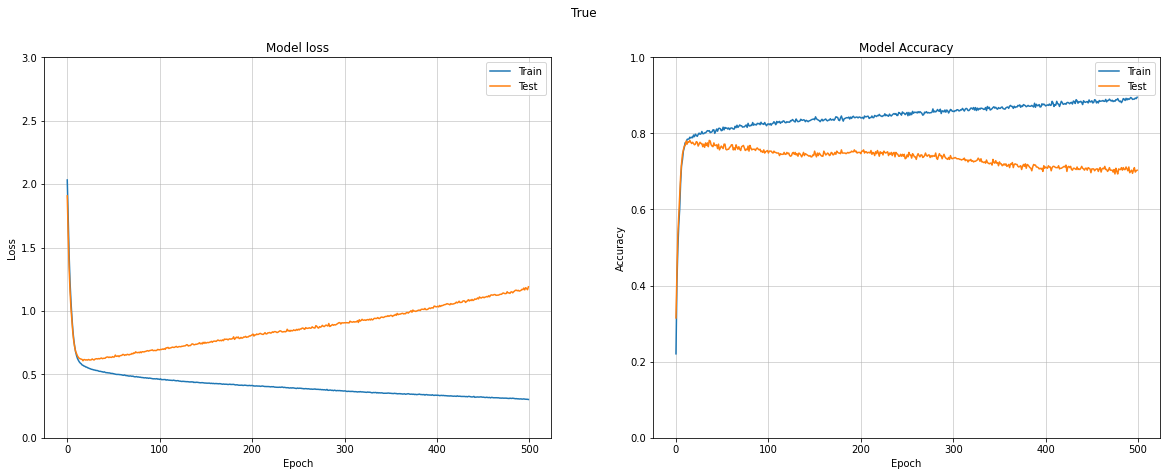

In [73]:
plot_loss_accuracy(history, title=True)

> YOUR ANSWER HERE

👩🏻‍🏫 We clearly see that ***the number of epochs we choose has a strong influence on the final results***: 

* **UNSUFFICIENT NUMBER OF EPOCHS $\implies$ UNDERFITTING**:
    * The algorithm is not optimal as its ***loss function has not converged yet***, 
    * i.e. it hasn't learned enough from the training data. 
* **TOO MANY EPOCHS** $\implies$ **OVERFITTING**: 
    * Our neural network has ***learned too much from the training data***, even its noisy information... 
    * and the algorithm ***does not generalize well on test data***.

🚦 What we want is to basically ***stop the algorithm when the test loss is minimal*** (or when the test metrics is maximal).



---

🧑🏻‍🏫 Let's introduce the **`Early Stopping`** criterion.

The Early Stopping criterion is a way to a***automatically stop the training of the algorithm before the end***, before the final number of epochs originally set.

🕵🏻‍♂️ How does it work ?

> Basically, it uses part of the dataset to check whether the "test" loss has stopped improving. You cannot use the test data itself to check that, otherwise, it is some kind of data leakage... Instead, we will ***use a subset of the initial training data***, called the ***validation set***.


<img src="validation_set.png" alt="Validation set" style="height:200px;"/>

✂️ To split the training data, we use the **`validation_split`** keyword in  the **`.fit()`**: it sets the percentage of data from the initial training set used in the **validation set**. 

❗️If you select a _validation_split_ of 30% for example, the last 30% rows of the training set will be used in the validation set. You can use **`shuffle = True`** to add some randomness.

💡 On top of the _validation_split_, we use the **`callbacks`** keyword in the **`.fit()`** to call the Early Stopping criterion at the end of each epoch. You can check additional information in the ["train_and_evaluate" documentation for Tensorflow/Keras](https://www.tensorflow.org/guide/keras/train_and_evaluate)

---

❓ **Question: Observing the Early Stopping criterion** ❓ 

Run the following code and plot the history.

In [75]:
%%time

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model = initialize_model(X_train)

# Fit the model on the train data
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 500,
                    batch_size = 16, 
                    verbose = 1, 
                    callbacks = [es])

Epoch 1/500
62/62 [==============================] - 0s 2ms/step - loss: 2.0500 - accuracy: 0.2268 - val_loss: 1.8649 - val_accuracy: 0.3254
CPU times: user 438 ms, sys: 30.3 ms, total: 468 ms
Wall time: 412 ms


❓ **Question: Evaluate this model that was stopped earlier** ❓

_(Also look at the historical losses)_

In [76]:
history.history

{'loss': [2.050023317337036],
 'accuracy': [0.22676199674606323],
 'val_loss': [1.8648797273635864],
 'val_accuracy': [0.3254156708717346]}

❗ **The problem with a strict Early Stopping** ❗ 

* The problem, with this type of approach, is that as soon as the loss of the validation set increases, the model stops. 

* However, as a neural network's convergence is stochastic, it happens that the loss slightly increases before decreasing again. 

✅ The `Early Stopping` criterion has a **`patience`** keyword that ***defines how many consecutive epochs without any loss decrease*** are allowed before we stop the training procedure.



❓ **Question: EarlyStopping with patience** ❓ 

Use the Early Stopping criterion with a patience of 30 epochs, plot the results and print the accuracy on the test set

🧑🏻‍🏫 **Remarks**


* 📉 The model continues to converge even though its loss function had some consecutive loss increases/decreases w.r.t. to the number of epochs. 

* 🤷🏻‍♂️ The `patience` number  to select is highly related to the task at hand and there is not any general rule of thumb. 

* 🧑🏻‍🏫 If you selected a high patience value for your Early Stopping:
    * 🤞 Your Neural Net should theoretically still stop training before the end (not always the case if your number of epochs is too low...)
    * ❗️ Your validation loss will increase again after reaching a minimum value... but ideally, you want it to be as low as possible. The validation loss potentially reaches a minimum for certain weights at a certain epoch. 
        * 🤔 How to collect these weights ? 
    
📚 The Early Stopping criterion enables you to:
- *stop the convergence*
- *restore the best weights of the Neural Network when it had the lowest error level (or the best score) on the validation set*, thanks to **`restore_best_weights = True`** (that is set to `False` by default).



❓ **Question: restore the best weights of a model** ❓ 

* Run the model with an Early Stopping criterion that will restore the best weights of the Neural Net
* Plot the loss and accuracy 
* Print the accuracy on the test set

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 30)

model = initialize_model(X_train)

# Fit the model on the train data
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 500,
                    batch_size = 16, 
                    verbose = 0, 
                    callbacks = [es])

model.evaluate(X_test, y_cat_test)
model.

19/19 [==============================] - 0s 555us/step - loss: 0.6280 - accuracy: 0.7567


AttributeError: 'Sequential' object has no attribute 'epochs'

In [95]:
es = EarlyStopping(patience = 30, restore_best_weights=True)

model = initialize_model(X_train)

# Fit the model on the train data
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 500,
                    batch_size = 16, 
                    verbose = 0, 
                    callbacks = [es],)

model.evaluate(X_test, y_cat_test)


19/19 [==============================] - 0s 588us/step - loss: 0.6167 - accuracy: 0.7783


[0.616678774356842, 0.778333306312561]

In [84]:
history.history['val_accuracy']

[0.20665083825588226,
 0.3372921645641327,
 0.4394299387931824,
 0.489311158657074,
 0.5581947565078735,
 0.6247031092643738,
 0.6864607930183411,
 0.705463171005249,
 0.7220902442932129,
 0.7292161583900452,
 0.7387173175811768,
 0.7434679269790649,
 0.7410926222801208,
 0.7363420724868774,
 0.7339667677879333,
 0.7315914630889893,
 0.7268408536911011,
 0.7315914630889893,
 0.7363420724868774,
 0.7292161583900452,
 0.7268408536911011,
 0.7339667677879333,
 0.7292161583900452,
 0.7220902442932129,
 0.7268408536911011,
 0.7268408536911011,
 0.7197149395942688,
 0.724465548992157,
 0.7315914630889893,
 0.724465548992157,
 0.7292161583900452,
 0.7292161583900452,
 0.7268408536911011,
 0.7292161583900452,
 0.7292161583900452,
 0.7363420724868774,
 0.7268408536911011,
 0.7268408536911011,
 0.7363420724868774,
 0.7292161583900452,
 0.7292161583900452,
 0.7410926222801208,
 0.7292161583900452,
 0.724465548992157,
 0.7339667677879333,
 0.7315914630889893,
 0.7292161583900452,
 0.73159146308898

In [88]:
model.evaluate(X_test, y_cat_test)

19/19 [==============================] - 0s 851us/step - loss: 0.6383 - accuracy: 0.7600


[0.6383269429206848, 0.7599999904632568]

🥡 <u>Takeaways from the Early Stopping criteron</u>:

* You can look at the 📚 [**Early Stopping** documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) 📚 to play with other parameters

*  No longer need to have a look at the number of epochs as long as the model hits the stopping criterion. So, in the future, you should set a large number of epochs and the Early Stopping criterion will take care of stopping the training procedure before the model overfits! 

### (2.2) Batch-size & Epochs

🕵️‍♀️ Let's investigate the impact of the batch size on training a Neural Network and how we can use it to control how fast the parameters are updated.

❓ **Question: playing with the batch size** ❓ 

Let's run the previous model with ***different batch sizes*** (with the Early Stopping criterion included) and plot the results.

👉 Run the following cell

CPU times: user 28.5 s, sys: 7.22 s, total: 35.7 s
Wall time: 18.9 s


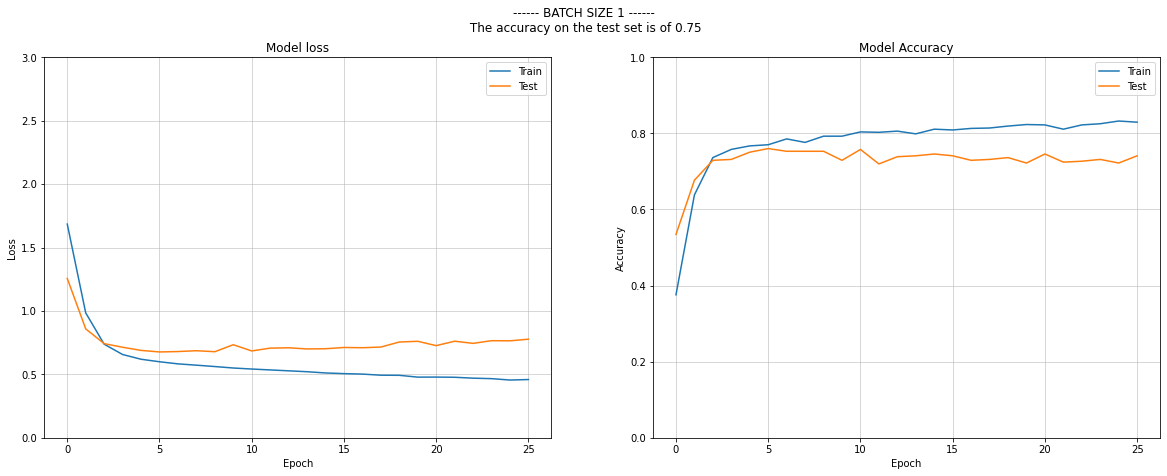

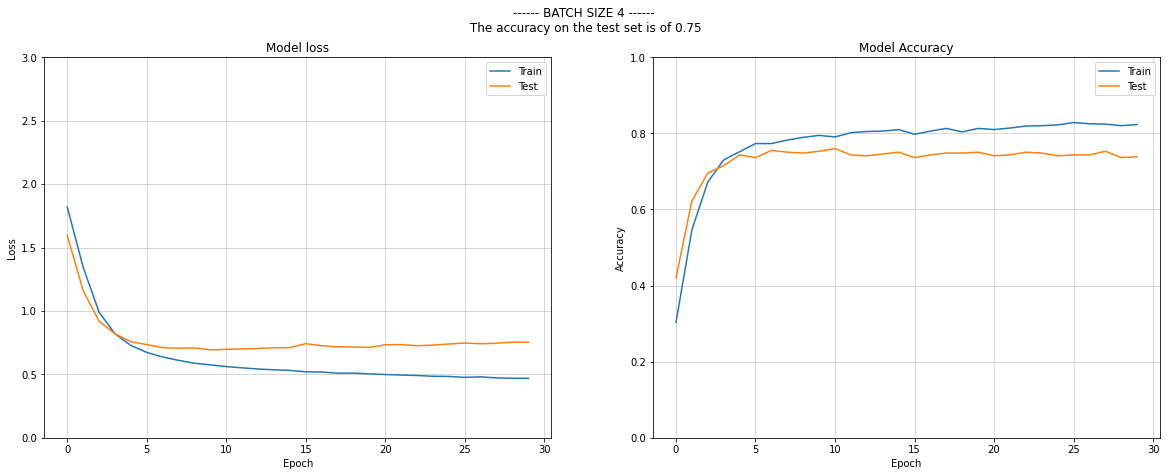

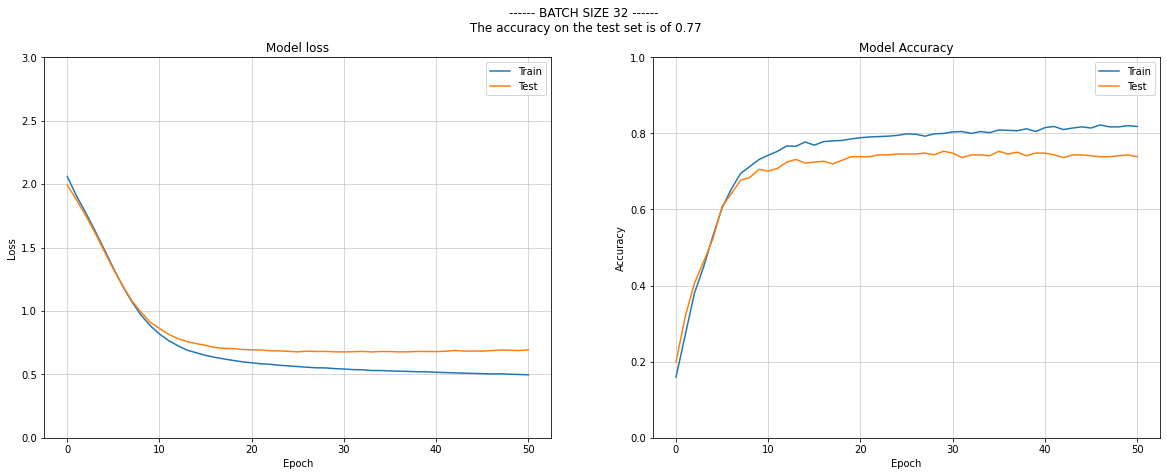

In [99]:
%%time
# RUN THIS CELL
es = EarlyStopping(patience=20, restore_best_weights=True)

for batch_size in [1, 4, 32]:
    
    model = initialize_model(X_train)

    history = model.fit(X_train, y_cat_train,
                        validation_split = 0.3,
                        epochs = 500,
                        batch_size = batch_size, 
                        verbose = 0, 
                        callbacks = [es])

    results = model.evaluate(X_test, y_cat_test, verbose=0)
    plot_loss_accuracy(history, title=f'------ BATCH SIZE {batch_size} ------\n The accuracy on the test set is of {results[1]:.2f}')

❓ **Question: impact of the batch size on the convergence of a Neural Network** ❓ 

Look at the oscillations of the accuracy and the loss with respect to the batch size number. 

Is this coherent with what we saw when playing with the Tensorflow Playground? 

> Your answer here

❓ **Questions about the number of parameters' updates** ❓ 

* How many optimizations of the weights are done within one epoch (with respect to the number of observations and the batch size)? 
* Therefore, is one epoch longer with a large or a small batch size?

With a small batch size

In [101]:
print(f"There are {X_train.shape[0]} rows in the training set")

batch_size = 16
epochs = 2

model = initialize_model(X_train)

history = model.fit(X_train, 
                    y_cat_train,
                    validation_split = 0.3,
                    epochs = epochs,
                    batch_size = batch_size, 
                    verbose = 1) 

There are 1400 rows in the training set
Epoch 1/2
62/62 [==============================] - 0s 2ms/step - loss: 2.0496 - accuracy: 0.2165 - val_loss: 1.9462 - val_accuracy: 0.2637
Epoch 2/2
62/62 [==============================] - 0s 1ms/step - loss: 1.8343 - accuracy: 0.3361 - val_loss: 1.7627 - val_accuracy: 0.3492


<details>
    <summary><i>Explanations</i></summary>


***`BEGIN_EXPLANATIONS`***   
        
Copy-paste this code in a new cell, run it and observe.
        
```python
print(f"There are {X_train.shape[0]} rows in the training set")

batch_size = 16
epochs = 2

model = initialize_model()

history = model.fit(X_train, 
                    y_train,
                    validation_split = 0.3,
                    epochs = epochs,
                    batch_size = batch_size, 
                    verbose = 1)        
```        


<u><b><i>Number of parameters' updates:</i></b></u>

* There are 1400 rows in the training set:
    * $ 70 \% \times 1400 = 980 $ rows are used as the train set within the training set
    * $ 30 \% \times 1400 = 420 $ rows are used as the validation set  

* For each epoch, we run a forward/backward propagation $ \large \lceil \frac{980}{batch size} \rceil = \lceil \frac{980}{16}\rceil = 62$ times

* Without the Early Stopping Criterion, we will have overall _number of_ $ epochs \times 62 = 2 \times 62 = 124 $ iterations 
        
<u><b><i>Impact of the batch size:</i></b></u>

The smaller the batch size 

$ \implies $ The more sub-iterations will be done 

$ \implies $ Parameters will be updated more frequently 

$ \implies $ We may need less epochs 

_(but we also don't care so much about the number of epochs if we use an Early Stopping Criterion with patience anyway)_    

***`END_EXPLANATIONS`***    
    
</details>    

In [0]:
batch_size = 16
epochs = 2

model = initialize_model()

history = model.fit(X_train, 
                    y_train,
                    validation_split = 0.3,
                    epochs = epochs,
                    batch_size = batch_size, 
                    verbose = 1)

### (2.3) Regularization

❗️ ***Neural Networks with a complex architecture  can quickly lead to overfitting*** (_"too many" layers and/or neurons..._). ❗️

🔥 But as Dense Neural Networks are _in fine_ activated linear regressions, the weights can be constrained using L1, L2 or L1-L2 penalties!


🚓 So, let's apply some L2 or L1 penalties to these neurons. As in Machine Learning, these penalties are called ***`Regularizers`***.



📚 <a href="https://www.tensorflow.org/api_docs/python/tf/keras/regularizers">**tensorflow/keras/regularizers**</a>

❓ **Initial Question: observing overfitting one more time before regularizing...**❓
 
* First, let's initialize a model that has too many parameters for the task such that it overfits the training data quickly. _To that purpose, let's not use any Early Stopping criterion._

🎁 Let's not waste time re-coding something that you are now used to, just run the following cell and observe what is happening 👇

The accuracy on the test set is 0.73...
...whereas the accuracy on the training set is 0.84!


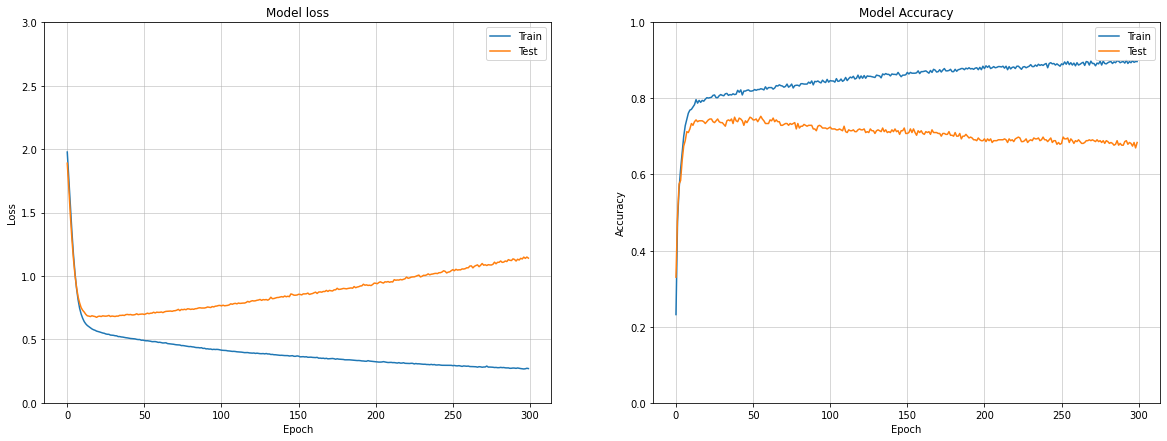

In [102]:
# RUN THIS CELL

# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_cat_train, verbose = 0)
results_test = model.evaluate(X_test, y_cat_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

☝️ In our *over-parametrized network*, ***some neurons became too specific to the given training data***, preventing the network from generalizing to new data. 

😕 This led to some overfitting...! 

❓ **Question: studying the impact of regularization on the Neural Net**❓
 
* Change the previous code to integrate a L2 or L1 regularizer to your different Dense Layers.

The accuracy on the test set is 0.76...
...whereas the accuracy on the training set is 0.78!


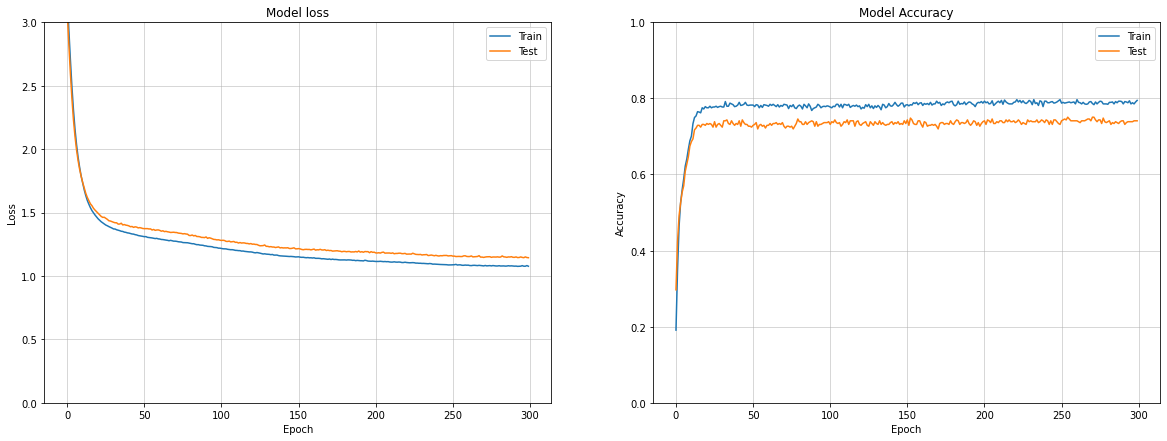

In [104]:
from tensorflow.keras import regularizers, Sequential, layers

reg_l1 = regularizers.L1(0.01)

# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10, kernel_regularizer=reg_l1))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(8, activation='softmax', kernel_regularizer=reg_l1))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_cat_train, verbose = 0)
results_test = model.evaluate(X_test, y_cat_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

### (2.4) Dropout layers

✂️ **`Dropout Layers`** ✂️

- ✅ They are super easy/straightforward to code 
- 👩🏻‍🏫 But what is going on _"under the hood"_ ? (You love this expression right ? 😏)

<u><i>Introduction to Dropout Layers</i><u>

* Their role is to randomly cancel the output of some neurons during the training phase
* It prevents the network from getting too specific to the input data. With Dropout layers,
    - No neuron can overspecialize in learning a pattern of the dataset because its output sometimes canceled by the Dropout Layer
    - Overall, a Dropout Layer forces the information of an input to go through multiple neurons instead of only one specific neuron

<details>
    <summary><i>[optional] Untoggle this for further explanations about Dropout Layers</i></summary>

🤔 Remember what we said about ***neurons becoming too specific*** ? 

---

⚽️ *An analogy with football:* 

Think about a football team. There are 11 players on the pitch, but there are also players on the bench, what for ? 
* The coach may want to substitute injured or tired players during the game
* The team may be:
    - losing the game and willing to replace a midfielder with a more ***versatile player*** who can be more offensive (= ***mix of*** midfielder/attacker role) 
    - winning the game and would like to secure the result by replacing a midfielder with a more ***versatile player*** who can be more defense ( = ***mix of*** midfielder/defense role)
    
💡 Well, in a Neural Net, there is also a risk that a neuron over-specialises in detecting one pattern, whereas it would be more advisable to keep it more versatile.
    
---

📚 **The goal of  [Dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) is to prevent neurons from over-specializing**.

🧑🏻‍🏫 How do Dropout layers work ? 

* 👉 When we apply a **Dropout rate** of 20% to a layer $k$, 20% of ***selected neurons*** will have their ***weights temporarily set to 0*** , which has the following consequences:
    1. A neuron computed at layer $k+1$ considers all the weights as usual, but since some of them were temporarily set to 0, they were “ignored” while creating the neurons of this layer $k+1$
    2. Once a batch of data points have been seen by the Neural Network (**forward propagation**) and 80% of the weights in a layer optimized/updated (**backward propagation** with the **adam** optimizer), the Neural Network moves on to the forward propagation of the next batch, where it will use :
        * 80% of the weights, those which were updated
        * 20% of weights, those which were previously ignored (which kept their original values and were actually not set in stone to 0 but just temporarily)
        * Based on these weights, we will again go through this Dropout Layer which is going to ignore again 20% of the weights of a given layer temporarily. Be careful, the selection of these 20% being random, the weights which will be ignored this time won't necessarily be the same weights as before !

* 👉 Think about the ***Dropout Rate*** as a ***sampling with replacement***

* 👉 By ***randomly shutting down*** different neurons at different epochs, we ***force the datapoints*** to be analysed by different neurons. At the end of the day, these neurons will become ***more versatile*** instead of overspecializing!
    
</details>

---

❓ **Question: studying the impact of Dropout layers on the Neural Net**❓

* Include some Dropout layers in the architecture of your original model. 
_(Don't add regularizers here)_

* What can you observe on the convergence of your model ? What about its power of generalization ? 

In [0]:
# RUN THIS CELL

# 1. Model Architecture
model = models.Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=10))
odel.add(layers.Dropout(rate=0.2)) 
model.add(layers.Dense(10, activation='relu'))
odel.add(layers.Dropout(rate=0.2)) 
model.add(layers.Dense(8, activation='softmax'))

# 2. Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Training 
history = model.fit(X_train, y_cat_train,
                    validation_split = 0.3,
                    epochs = 300,           # Notice that we are not using any Early Stopping Criterion
                    batch_size = 16, 
                    verbose=0)

# 4. Evaluation
results_train = model.evaluate(X_train, y_cat_train, verbose = 0)
results_test = model.evaluate(X_test, y_cat_test, verbose = 0)


# 5. Looking back at what happened during the training phase
print(f'The accuracy on the test set is {results_test[1]:.2f}...')
print(f'...whereas the accuracy on the training set is {results_train[1]:.2f}!')
plot_loss_accuracy(history)

<u><b>Conclusions:</b></u>

* ❗️ If you train a Neural Network too much (too many layers, too many neurons and/or too many epochs), it will overfit very quickly

* 🥊 To prevent overfitting in Deep Learning, you can use Early Stopping, Regularization and Dropout Layers.

* ❗️ Be careful, if you use these techniques, you might end up on the other spectrum of the performance where you model would underfit the dataset!

* 🆗 You could potentially look at the batch size but we usually use 16 or 32. And as the French Computer Scientist [**Yann Lecun**](https://en.wikipedia.org/wiki/Yann_LeCun) said (Facebook x NYU):

<img src="https://github.com/lewagon/data-images/blob/master/DL/deep_learning_yann_lecun_batch_size.png?raw=true" alt="batch_size_yann_lecun" width="400" height="250">



🏁 Congratulations !

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge !